In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
filename = "/Users/t866229/input/prophet/ENB_5yr.csv"
data = pd.read_csv(filename) 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,46.220001,46.389999,45.070000,45.180000,34.946369,944500
1,2015-07-10,45.700001,45.779999,44.980000,45.480000,35.178413,713500
2,2015-07-13,45.990002,46.380001,45.619999,46.110001,35.665707,678000
3,2015-07-14,45.970001,45.990002,45.360001,45.630001,35.294437,673800
4,2015-07-15,45.369999,45.980000,44.970001,45.270000,35.015984,670300


In [20]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,37.297554,37.645623,36.886672,37.268348,32.314437,3.251099e+06
std,4.270528,4.225975,4.326034,4.280784,3.208313,5.016844e+06
min,23.820000,25.430000,22.570000,23.740000,22.390249,3.979000e+05
25%,33.780000,34.000000,33.445000,33.720000,30.235653,1.672500e+06
50%,37.459999,37.730000,37.080002,37.459999,32.976994,2.515500e+06
75%,41.090000,41.389999,40.699999,41.119999,34.368553,3.701200e+06
max,46.220001,46.389999,45.619999,46.110001,41.669048,1.512626e+08


In [21]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2015-07-09,45.180000
1,2015-07-10,45.480000
2,2015-07-13,46.110001
3,2015-07-14,45.630001
4,2015-07-15,45.270000


In [22]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

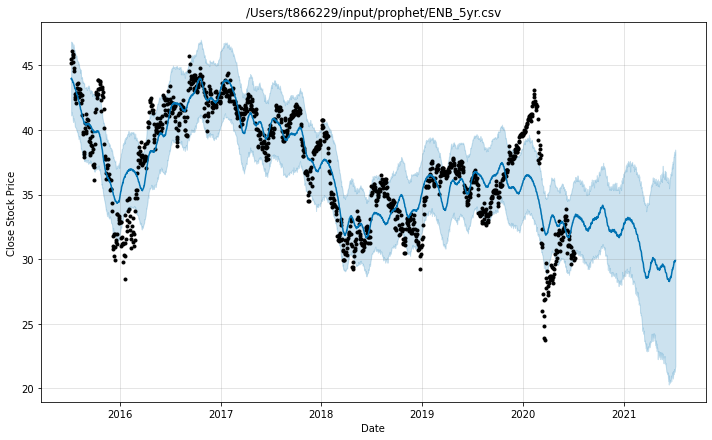

In [23]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title(filename)
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

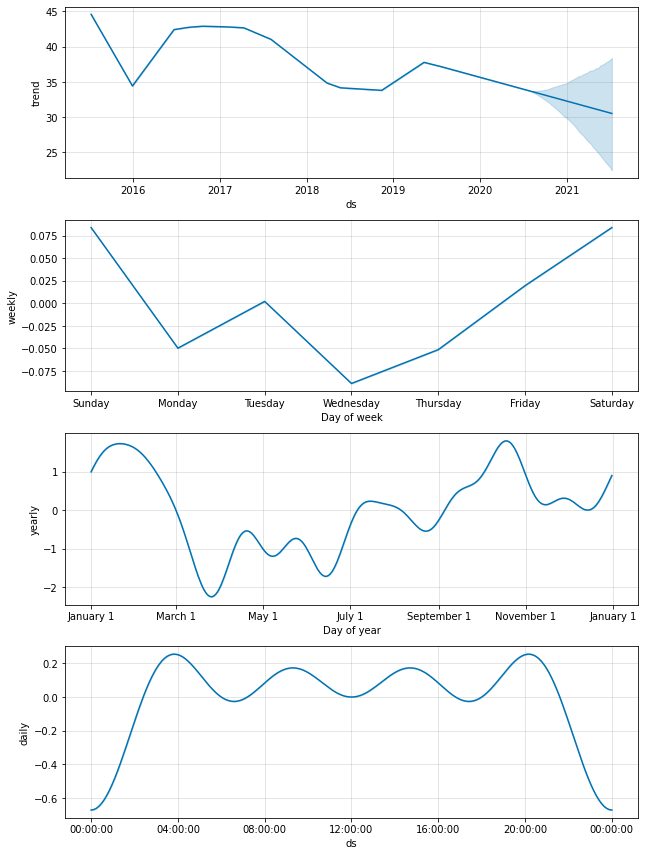

In [24]:
m.plot_components(prediction)
plt.show()